## 230968336
## SAMEER RAJ
## WEEK 5
## Q 2

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout

In [2]:
df = pd.read_csv("google_stock.csv")
df

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.470,713.1200,716.48,1306065,718.27,722.470,713.1200,716.48,1306065,0.0,1.0
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.980,717.3100,719.00,1214517,718.92,722.980,717.3100,719.00,1214517,0.0,1.0
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.650,703.2600,714.91,1982471,710.36,716.650,703.2600,714.91,1982471,0.0,1.0
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.820,688.4515,708.65,3402357,691.72,708.820,688.4515,708.65,3402357,0.0,1.0
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.480,693.4100,698.77,2082538,693.71,702.480,693.4100,698.77,2082538,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,GOOG,2021-06-07 00:00:00+00:00,2466.09,2468.000,2441.0725,2451.32,1192453,2466.09,2468.000,2441.0725,2451.32,1192453,0.0,1.0
1254,GOOG,2021-06-08 00:00:00+00:00,2482.85,2494.495,2468.2400,2479.90,1253253,2482.85,2494.495,2468.2400,2479.90,1253253,0.0,1.0
1255,GOOG,2021-06-09 00:00:00+00:00,2491.40,2505.000,2487.3300,2499.50,1006337,2491.40,2505.000,2487.3300,2499.50,1006337,0.0,1.0
1256,GOOG,2021-06-10 00:00:00+00:00,2521.60,2523.260,2494.0000,2494.01,1561733,2521.60,2523.260,2494.0000,2494.01,1561733,0.0,1.0


In [3]:
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date')

In [4]:
data = df[['date', 'close']]

In [5]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data['close'].values.reshape(-1,1))

In [6]:
def create_sequences(data, time_step=60):
    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i-time_step:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

In [7]:
train_data = scaled_data[data['date'] < '2020-01-01']
test_data = scaled_data[data['date'] >= '2020-01-01']

X_train, y_train = create_sequences(train_data)
X_test, y_test = create_sequences(test_data)

In [8]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [10]:
model = Sequential([
    SimpleRNN(64, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2), 
    SimpleRNN(64),
    Dropout(0.2),
    Dense(1) 
])

In [11]:
model.compile(optimizer='adam', loss='mse')
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)

Epoch 1/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0581 - val_loss: 0.0365
Epoch 2/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0164 - val_loss: 0.0374
Epoch 3/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0077 - val_loss: 0.0161
Epoch 4/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0062 - val_loss: 0.0215
Epoch 5/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0045 - val_loss: 0.0148
Epoch 6/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0037 - val_loss: 0.0149
Epoch 7/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0027 - val_loss: 0.0087
Epoch 8/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0028 - val_loss: 0.0076
Epoch 9/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0023 - val_loss: 0.0065
Epoch 10/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0021 - val_loss: 0.0076
Epoch 11/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0019 - val_loss: 0.0028
Epoch 12/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0

In [12]:
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1,1))

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


In [15]:
mape = mean_absolute_percentage_error(y_test_actual, y_pred)
mse = mean_squared_error(y_test_actual, y_pred)

print("MAPE:", mape)
print("MSE:", mse)


MAPE: 0.023574163667440928
MSE: 3678.731143358822


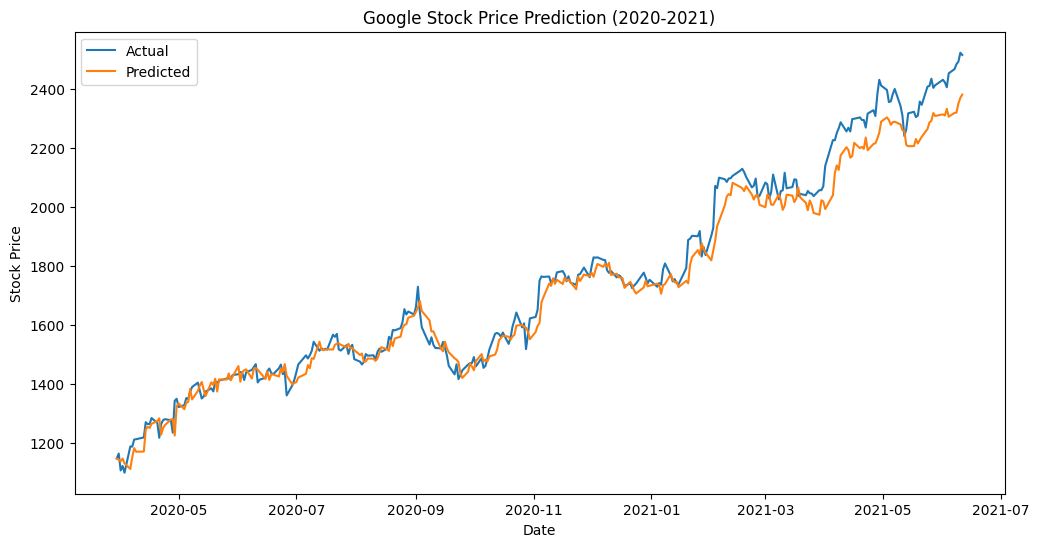

In [16]:
plt.figure(figsize=(12,6))
plt.plot(data[data['date'] >= '2020-01-01']['date'][60:], y_test_actual, label="Actual")
plt.plot(data[data['date'] >= '2020-01-01']['date'][60:], y_pred, label="Predicted")
plt.title("Google Stock Price Prediction (2020-2021)")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()
plt.show()